In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## all events

In [2]:
event = [i for i in dir(cv2) if "EVENT" in i]
print(event)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


## create circle by click

In [3]:
def create_circle (event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img,(x,y),10,(0,255,255),-1)

img = np.zeros((500,500,3),dtype=np.uint8)
cv2.namedWindow("image")
cv2.setMouseCallback("image",create_circle)

while True :
    cv2.imshow("image",img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

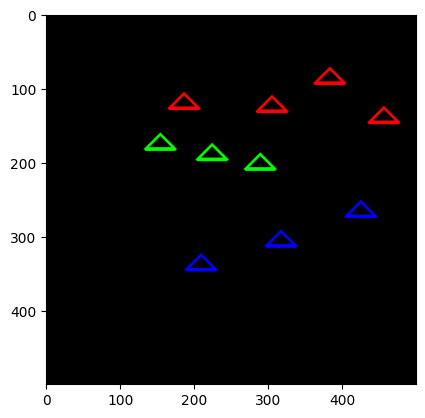

In [4]:
img = np.zeros((500,500,3),np.uint8)

drawing = False
color = (0,255,0)
triangle = [5,]

def paint_click(event,x,y,flags,param):
    global drawing , color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        pts = np.array([[x,y],[x-20,y+20],[x+20,y+20]],np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,color,3)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("image_paint")
cv2.setMouseCallback("image_paint",paint_click)

while True :
    cv2.imshow("image_paint",img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord("g"):
        color = (0,255,0)
    elif k == ord("r"):
        color = (0,0,255)
    elif k == ord("b"):
        color = (255,0,0)
    elif k == 27 & 0xFF:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])



## paint brush

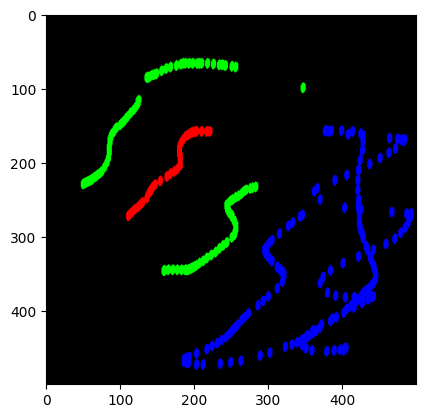

In [5]:
img = np.zeros((500,500,3),np.uint8)

drawing = False
color = (0,255,0)

def paint_click(event,x,y,flags,param):
    global drawing , color
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True :
            cv2.ellipse(img,(x,y),(3,7),4,0,360,color,-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("image_paint")
cv2.setMouseCallback("image_paint",paint_click)

while True :
    cv2.imshow("image_paint",img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord("g"):
        color = (0,255,0)
    elif k == ord("r"):
        color = (0,0,255)
    elif k == ord("b"):
        color = (255,0,0)
    elif k == 27 & 0xFF:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])



In [6]:
ord("e")

101

## draw line

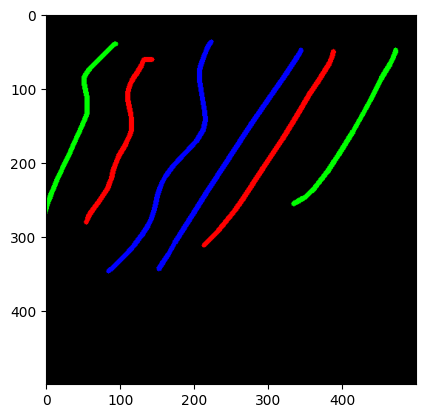

In [7]:
img = np.zeros((500,500,3),np.uint8)
drawing =False
ix = 0 
iy = 0
color = (0,255,0)

def paint_line (event, x,y,flags,param):
    global drawing ,ix,iy , color
    if event ==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix = x
        iy = y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing ==True:
            cv2.line(img,pt1=(ix,iy),pt2=(x,y),color=color,thickness=5)
            ix = x
            iy = y

    elif event ==cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("draw_line")
cv2.setMouseCallback("draw_line",paint_line)

while True:
    cv2.imshow("draw_line",img)
    k = cv2.waitKey(1) & 0xFF
    if k==ord("g"):
        color = (0,255,0)
    elif k==ord("b"):
        color = (255,0,0)
    elif k==ord("r"):
        color = (0,0,255)
    elif k==27 & 0xFF:
        break


cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

# draw rectangle

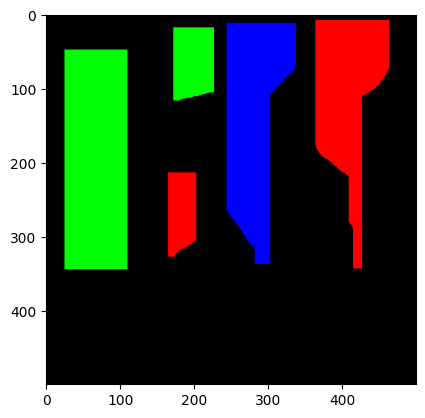

In [8]:
img = np.zeros((500,500,3),np.uint8)

drawing = False
color = (0,255,0)
start_point = (0,0)

def paint_rectangle (event,x,y,flags,param):
    global drawing,color,start_point
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        start_point = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img,start_point,(x,y),color,-3)
    elif event ==cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("draw_rec")
cv2.setMouseCallback("draw_rec",paint_rectangle)

while True:
    cv2.imshow("draw_rec",img)
    k = cv2.waitKey(1) & 0xFF
    if k==ord("g"):
        color = (0,255,0)
    elif k==ord("b"):
        color = (255,0,0)
    elif k==ord("r"):
        color = (0,0,255)
    elif k==27 & 0xFF:
        break


cv2.destroyAllWindows()
plt.imshow(img[...,::-1])

# draw rectangle with reset feature

[[(289, 262), (555, 421)], [(164, 37), (417, 169)], [(555, 14), (759, 174)]]


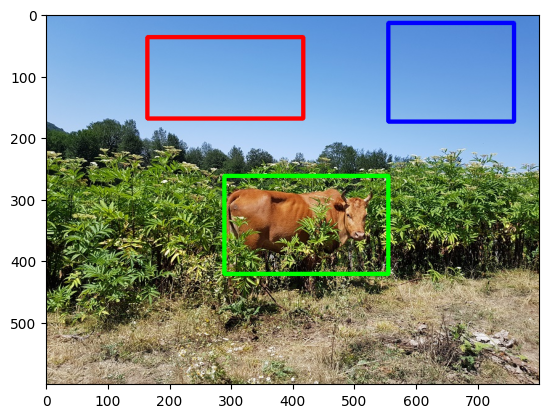

In [9]:
img = cv2.imread("images/input.jpg")
clone = img.copy()

drawing = False
color = (0,255,0)
point = []
start_point = (0,0)

def paint_rectangle (event,x,y,flags,param):
    global drawing,color,start_point
    if event==cv2.EVENT_LBUTTONDOWN:
        start_point = x,y
    elif event ==cv2.EVENT_LBUTTONUP:
        point.append([start_point,(x,y)])
        drawing = True
        cv2.rectangle(img,start_point,(x,y),color,5)

cv2.namedWindow("draw_rec")
cv2.setMouseCallback("draw_rec",paint_rectangle)

while True:
    cv2.imshow("draw_rec",img)
    k = cv2.waitKey(1) & 0xFF
    if k==ord("c"):
        img = clone.copy()
        point=[]
    elif k==ord("g"):
        color = (0,255,0)
    elif k==ord("b"):
        color = (255,0,0)
    elif k==ord("r"):
        color = (0,0,255)
    elif k==27 & 0xFF:
        break


cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
print(point)

## preview rectangle

[[(132, 64), (291, 190)], [(338, 48), (513, 168)], [(572, 23), (792, 178)]]


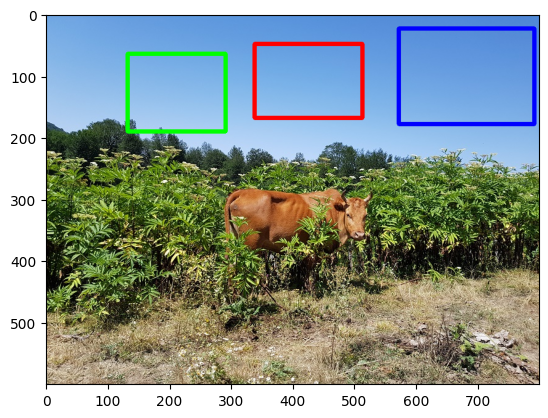

In [10]:
img = cv2.imread("images/input.jpg")
clone = img.copy()
temp = img.copy()

color = (0,255,0)
point = []
drawing = False
start_paint = (0,0)

def paint_rec(event,x,y,flags,param):
    global point,color,drawing,start_paint
    if event == cv2.EVENT_LBUTTONDOWN:
        start_paint=(x,y)
        drawing =True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            temp=img.copy()
            cv2.rectangle(temp,start_paint,(x,y),color,3)
            cv2.imshow("img_rec",temp)
    elif event == cv2.EVENT_LBUTTONUP:
        cv2.rectangle(img,start_paint,(x,y),color,5)
        cv2.imshow("img_rec", img)
        point.append([start_paint,(x,y)])
        drawing = False

cv2.namedWindow("img_rec")
cv2.setMouseCallback("img_rec",paint_rec)

while True:
    if drawing == False:
        cv2.imshow("img_rec",img)
    k= cv2.waitKey(1) & 0xFF
    if k==ord("c"):
        img = clone.copy()
        point = []
    elif k==ord("g"):
        color = (0,255,0)
    elif k==ord("b"):
        color = (255,0,0)
    elif k==ord("r"):
        color = (0,0,255)
    elif k==27 & 0xFF:
        break

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
print(point)

## with undo future

[[(235, 216), (559, 434)], [(280, 56), (446, 138)], [(538, 45), (700, 188)]]


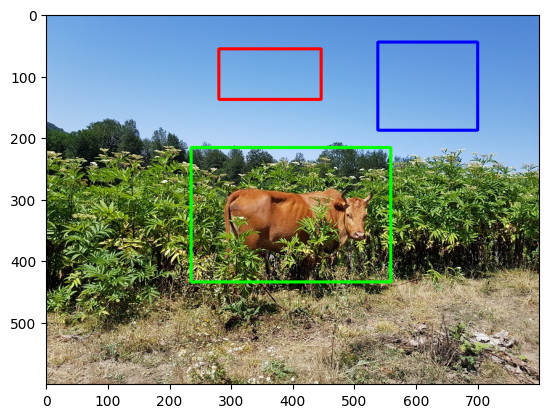

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("images/input.jpg")
clone = img.copy()
temp = img.copy()

color = (0,255,0)
point =[]
drawing = False
start_paint = (0,0)

def paint_rec (event,x,y,flags,param):
    global temp,color,point,drawing ,start_paint
    if event == cv2.EVENT_LBUTTONDOWN:
        start_paint = (x,y)
        drawing= True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            temp = img.copy()
            cv2.rectangle(temp,start_paint,(x,y),color,2)
            cv2.imshow("img_rec",temp)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        point.append([start_paint,(x,y)])
        cv2.rectangle(img,start_paint,(x,y),color,3)

cv2.namedWindow("img_rec")
cv2.setMouseCallback("img_rec",paint_rec)

while True:
    if drawing==False:
        cv2.imshow("img_rec",img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord("c"):
        img = clone.copy()
        point = []
    elif k == ord("g"):
        color = (0,255,0)
    elif k == ord("b"):
        color = (255,0,0)   
    elif k == ord("r"):
      color = (0,0,255)
    elif k == ord("z"):
       img = clone.copy()
       point.pop()
       for i in point:
           cv2.rectangle(img,i[0],i[1],color,3)
    elif k==27 & 0xFF:
        break
cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
print(point)

# Trackbar

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

max_alpha = 100
window_name = "trackbar"
def on_track (val):
    alpha = (val/max_alpha)
    beta = 1.0 - alpha
    dst = cv2.addWeighted(src1=img1,alpha=alpha,src2=img2,beta=beta,gamma=0.0)
    cv2.imshow(window_name,dst)

cv2.namedWindow(window_name)

img1 = cv2.imread("images/class.vision.jpg")
img2 = cv2.imread("images/opencv.jpg")
track_name = "alpha"

cv2.createTrackbar(track_name,window_name,0,max_alpha,on_track)
on_track(0)
cv2.waitKey(0)
cv2.destroyAllWindows()

Text(0.5, 1.0, 'alpha:0.59')

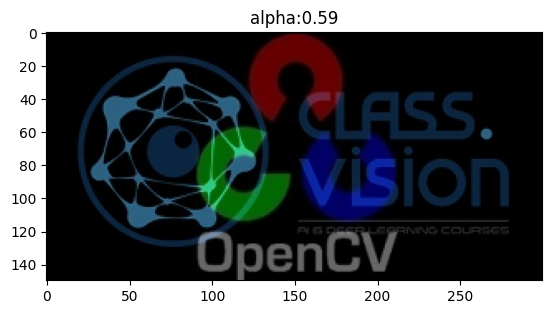

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

alpha_max = 100
name_window = "track"
track_name ="alpha"

def on_track (val):
    global alpha , dst
    alpha = val/alpha_max
    beta = 1.0 - alpha
    dst = cv2.addWeighted(img1,alpha,img2,beta,0.0)
    cv2.imshow(name_window,dst)

img1 = cv2.imread("images/class.vision.jpg")
img2 = cv2.imread("images/opencv.jpg")
cv2.namedWindow(name_window)
cv2.createTrackbar(track_name,name_window,0,alpha_max,on_track)
on_track(0)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(dst[...,::-1])
plt.title(f"alpha:{alpha}")

Text(0.5, 1.0, 'RED:89 , BLUE:80 , GREEN:26')

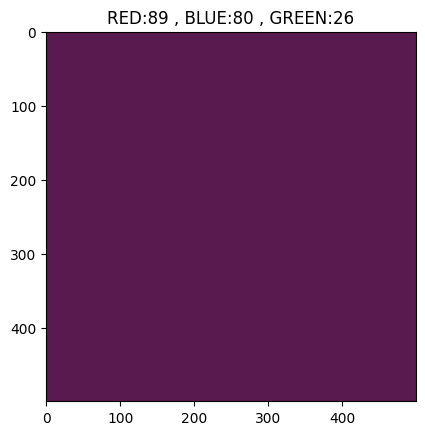

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((500,500,3),np.uint8)

def nothing(val):
    pass

name_window="colors"
cv2.namedWindow(name_window)

cv2.createTrackbar("r",name_window,0,255,nothing)
cv2.createTrackbar("g",name_window,0,255,nothing)
cv2.createTrackbar("b",name_window,0,255,nothing)
switch = "OFF : ON"
cv2.createTrackbar(switch,name_window,0,1,nothing)

while True:
    cv2.imshow(name_window,img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
    r =  cv2.getTrackbarPos("r",name_window)
    g =  cv2.getTrackbarPos("g",name_window)
    b =  cv2.getTrackbarPos("b",name_window)
    s =  cv2.getTrackbarPos(switch,name_window)
    if s == 0 :
        img[:]=0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
plt.title(f"RED:{r} , BLUE:{b} , GREEN:{g}")

# paint brush

Text(0.5, 1.0, 'RED:199 , BLUE:79 , GREEN:99 , SIZE:8')

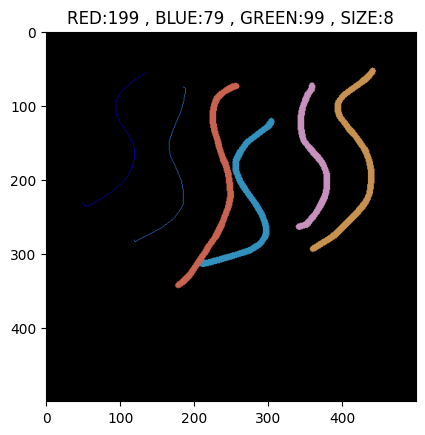

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.zeros((500,500,3),np.uint8)
ix=0
iy=0
window_name="paint"
drawing=False
cv2.namedWindow(window_name)
def paint(event,x,y,flags,params):
    global ix,iy,drawing ,color,size
    if event ==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        ix=x
        iy=y
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.line(img,(ix,iy),(x,y),color,size)
            ix=x
            iy=y
    elif event == cv2.EVENT_LBUTTONUP:
        drawing=False


def nothing(val):
    pass

cv2.createTrackbar("r",window_name,0,255,nothing)
cv2.createTrackbar("g",window_name,0,255,nothing)
cv2.createTrackbar("b",window_name,0,255,nothing)
cv2.createTrackbar("s",window_name,1,30,nothing)


cv2.setMouseCallback(window_name,paint)

while True:
    cv2.imshow(window_name,img)
    if cv2.waitKey(1) & 0xFF ==27:
        break
    r = cv2.getTrackbarPos("r",window_name)
    g = cv2.getTrackbarPos("g",window_name)
    b = cv2.getTrackbarPos("b",window_name)
    s = cv2.getTrackbarPos("s",window_name)
    color = (b,g,r)
    if s == 0:
     size = 1 # اگر صفر بود، آن را 1 در نظر بگیر
    else:
     size = s

cv2.destroyAllWindows()
plt.imshow(img[...,::-1])
plt.title(f"RED:{r} , BLUE:{b} , GREEN:{g} , SIZE:{s}")

## video capture

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# set camera or video 
cap = cv2.VideoCapture(0)

In [ ]:
rest , frame = cap.read()
# release to close window
cap.release()
plt.imshow(frame[...,::-1])

In [ ]:
cap =cv2.VideoCapture(0)
while True:
    res, frame = cap.read()
    fliped = cv2.flip(frame,1)
    cv2.imshow("flip",fliped)
    cv2.imshow("normal",frame)
    if cv2.waitKey(1) & 0xFF ==27:
        break
cap.release()
cv2.destroyAllWindows()

## gamma webcom controll

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap =cv2.VideoCapture(0)
gamma = float(input("enter gamma between 0 - 1"))
lookuptable = np.empty((1,256),dtype=np.uint8)
for i in range (256):
    lookuptable[0,i] = np.clip(np.pow(i/255.0,gamma) * 255.0,0,255)


while True:
    res, frame = cap.read()
    fliped = cv2.flip(frame,1)
    gamma_img = cv2.LUT(fliped,lookuptable)
    cv2.imshow("flip",fliped)
    cv2.imshow("normal",frame)
    cv2.imshow("gamma",gamma_img)
    # press q to quit
    if cv2.waitKey(1) & 0xFF ==ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

### channels webcame

In [ ]:
cap =cv2.VideoCapture(0)
while True:
    res , frame = cap.read()
    height , wdith ,_ =frame.shape
    B,G,R = cv2.split(frame)
    zero = np.zeros((height,wdith),np.uint8)
    green = cv2.merge([zero,G,zero])
    blue = cv2.merge([B,zero,zero])
    red = cv2.merge([zero,zero,R])
    cv2.imshow("green",green)
    cv2.imshow("blue",blue)
    cv2.imshow("red",red)
    if cv2.waitKey(1) & 0xFF ==27:
        break
cap.release()
cv2.destroyAllWindows()

# video load

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cap = cv2.VideoCapture("videos/vid.mp4")

# 1. گرفتن نرخ فریم بر ثانیه (FPS) از ویدیو
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Video FPS: {fps}")

# 2. محاسبه تأخیر لازم بین هر فریم به میلی‌ثانیه
# اگر fps صفر بود (برای جلوگیری از خطا)، یک مقدار پیش‌فرض در نظر می‌گیریم
delay = int(1000 / fps) if fps > 0 else 25

while True:
    res, frame = cap.read()
    if not res:
        print("exit..")
        break
    
    cv2.imshow("tot", frame)
    
    # 3. از تأخیر محاسبه شده در waitKey استفاده کنید
    if cv2.waitKey(delay) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture("videos/vid.mp4")

print(fps)
while True:
    res , frame = cap.read()

    if not res:
        print("exit")
        break
    cv2.imshow("video",frame)

    if cv2.waitKey(1) & 0xFF ==27:
        break
cap.release()
cv2.destroyAllWindows()


In [ ]:
cap = cv2.VideoCapture("videos/vid.mp4")
while True:
    res , frame = cap.read()
    if not res:
        print("exit")
        break
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cv2.imshow("video",frame)
    if cv2.waitKey(1) & 0xFF==27:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture("videos/vid.mp4")
for i in range(20):
    print(cap.get(i))

## get video feature

In [ ]:
print("wdith:",cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print("height:",cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS:",cap.get(cv2.CAP_PROP_FPS))

# save video

<div style="direction:rtl;text-align:right;font-family:Tahoma">
FourCC یک کد 4 بایتی است که برای تعیین کدک ویدیو استفاده می شود. لیست کدهای موجود را می توانید در fourcc.org بیابید.
</div>

[FourCC](https://en.wikipedia.org/wiki/FourCC)


**In Fedora:**

    DIVX, XVID, MJPG, X264, WMV1, WMV2. 
    (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
**In Windows:** 

    DIVX   
**In OSX:**

    MJPG (.mp4), DIVX (.avi), X264 (.mkv).


We create a VideoWriter object. We should specify the output file name (eg: output.avi). Then we should specify the FourCC code. Then number of frames per second (fps) and frame size should be passed. And the last one is the isColor flag. If it is True, the encoder expect color frame, otherwise it works with grayscale frame.

FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.

## ۱. از کجا فرمت یا کدک (FourCC) را بدانم؟

کد **FourCC** (کد چهارحرفی) مشخص می‌کند که ویدیو با چه الگوریتمی فشرده شود (به آن **کدک** یا **Codec** می‌گویند). انتخاب شما به چند عامل بستگی دارد:

  * **سیستم عامل شما**: برخی کدک‌ها روی ویندوز به خوبی کار می‌کنند و برخی روی لینوکس.
  * **کدک‌های نصب شده**: آیا نرم‌افزارهای لازم برای استفاده از آن کدک روی سیستم شما نصب است؟
  * **فرمت فایل خروجی**: برخی کدک‌ها برای فایل‌های `.avi` مناسب هستند و برخی برای `.mp4`.

در عمل نیازی نیست نگران همه این‌ها باشید. بهتر است از چند کدک استاندارد و معروف استفاده کنید که تقریبا همه جا کار می‌کنند.

## جدول جامع کدک‌های ویدیویی (FourCC)

این جدول شامل کدک‌های رایج برای فشرده‌سازی با اتلاف (Lossy)، بدون اتلاف (Lossless) و گزینه‌های مدرن است.

| کد FourCC | نام کدک (Codec) | فرمت فایل مناسب | توضیحات و کاربرد |
| :--- | :--- | :--- | :--- |
| `*'XVID'` | Xvid / MPEG-4 Part 2 | `.avi` | **(بسیار رایج)** بهترین گزینه برای شروع. تعادل عالی بین کیفیت و حجم. سازگاری بسیار بالا در اکثر سیستم‌عامل‌ها. |
| `*'DIVX'` | DivX | `.avi` | مشابه Xvid، یکی دیگر از پیاده‌سازی‌های محبوب MPEG-4. سازگاری گسترده‌ای دارد. |
| `*'MJPG'` | Motion JPEG | `.avi` | فشرده‌سازی هر فریم به صورت یک عکس JPEG. حجم فایل‌ها بزرگ است، اما پردازش بسیار سریع و سبک است. عالی برای وب‌کم‌ها و ویرایش فریم به فریم. |
| `*'mp4v'` | MPEG-4 Video | `.mp4`, `.mov` | یک استاندارد قدیمی‌تر برای فرمت MP4. سازگاری خوبی دارد اما H.264 معمولاً گزینه بهتری است. |
| `*'avc1'` | H.264 / AVC | `.mp4`, `.mov`, `.mkv`| **(استاندارد مدرن)** یکی از پرکاربردترین کدک‌ها. فشرده‌سازی فوق‌العاده با حفظ کیفیت بالا (حجم فایل بسیار کم). نیازمند کدک‌های نصب شده روی سیستم است. |
| `*'H264'` | H.264 (raw) | `.mp4`, `.mkv` | مشابه `avc1`، یک شناسه دیگر برای کدک بسیار محبوب H.264. |
| `*'HEVC'` | H.265 / HEVC | `.mp4`, `.mkv` | **(فوق پیشرفته)** نسل بعدی H.264. حدوداً دو برابر فشرده‌تر است (نصف حجم فایل برای کیفیت یکسان). نیازمند سخت‌افزار قوی‌تر برای فشرده‌سازی است. |
| `*'VP90'` | VP9 | `.webm`, `.mkv` | کدک مدرن توسعه‌یافته توسط گوگل. رقیب اصلی H.265 و رایج در یوتیوب. متن-باز و بدون حق امتیاز (Royalty-Free). |
| `*'AV01'` | AV1 | `.mp4`, `.mkv`, `.webm`| **(جدیدترین نسل)** جدیدترین کدک متن-باز که از VP9 و HEVC هم فشرده‌تر است. به سرعت در حال تبدیل شدن به استاندارد وب است اما نیازمند سخت‌افزار بسیار قوی است. |
| `*'WMV1'` | Windows Media Video 7 | `.wmv`, `.asf` | کدک قدیمی‌تر مایکروسافت. برای کاربردهای مرتبط با ویندوز مناسب است. |
| `*'WMV2'` | Windows Media Video 8 | `.wmv`, `.asf` | نسخه بهبودیافته کدک مایکروسافت با کیفیت بهتر. |
| `*'I420'` | I420 (Raw YUV) | `.avi` | فرمت خام و بدون فشرده‌سازی. حجم فایل بسیار بسیار بزرگ است. برای کارهای آنالیز تصویر که نباید هیچ اطلاعاتی از دست برود، استفاده می‌شود. |
| `*'IYUV'` | IYUV (Raw YUV) | `.avi` | یکی دیگر از فرمت‌های خام و بدون فشرده‌سازی، مشابه I420. |
| `*'FFV1'` | FFmpeg Video 1 | `.avi`, `.mkv` | **(بدون اتلاف)** یک کدک Lossless عالی. فشرده‌سازی خوبی (نسبت به فایل خام) بدون از دست دادن هیچ کیفیتی ارائه می‌دهد. مناسب برای آرشیو و کارهای حرفه‌ای. |


In [ ]:
cap =cv2.VideoCapture(0)
fourc =cv2.VideoWriter_fourcc(*"xvid")
# گرفتن عرض فریم
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# گرفتن ارتفاع فریم
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# ساخت اندازه فریم برای VideoWriter
frame_size = (width, height)

out = cv2.VideoWriter("output.avi",fourcc=fourc,fps=25,frameSize=frame_size,isColor=True)

while cap.isOpened():
    res , frame =cap.read()
    if not res:
        print("exit or get outed")
        break
    frame=cv2.flip(frame,1)
    out.write(frame)
    cv2.imshow("web",frame)
    if cv2.waitKey(1) & 0xFF ==27:
        break
out.release()
cap.release()
cv2.destroyAllWindows()


In [ ]:
cap =cv2.VideoCapture("videos/vid.mp4")
four_cc = cv2.VideoWriter_fourcc(*"MJPG")

fps_ = cap.get(cv2.CAP_PROP_FPS)
wdith_ = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size_ = (wdith_,height)
out = cv2.VideoWriter(filename="output.avi",fourcc=four_cc,fps=fps_,frameSize=size_,isColor=True)

while cap.isOpened():
    res , frame = cap.read()
    if not res:
        print("exit or get outed")
        break
    frame=cv2.flip(frame,1)
    out.write(frame)
    cv2.imshow("web",frame)
    if cv2.waitKey(1) & 0xFF ==27:
        break
out.release()
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap =cv2.VideoCapture("videos/vid.mp4")
four_cc = cv2.VideoWriter_fourcc(*"MJPG")

fps_ = cap.get(cv2.CAP_PROP_FPS)
wdith_ = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
size_ = (wdith_,height)
out = cv2.VideoWriter(filename="output.avi",fourcc=four_cc,fps=fps_,frameSize=size_,isColor=False)

while cap.isOpened():
    res , frame = cap.read()
    if res==True:
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        out.write(gray)
    else:
        print("DONE")
        break
out.release()
cap.release()
cv2.destroyAllWindows()

# CCTV

https://www.wowza.com/developer/rtsp-stream-test

In [ ]:
import cv2 

# Our Free Test RSTP Link
# You can configure your CCTV IPTV Cameras to output a RSTP Stream
cap = cv2.VideoCapture("rtsp://wowzaec2demo.streamlock.net/vod/mp4:BigBuckBunny_115k.mov")

while True:
    ret, frame = cap.read()

    cv2.imshow('CCTV', frame)
    
    if cv2.waitKey(1) == 27:
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()      

https://github.com/jeffbass/imagezmq#introduction

In [ ]:
import cv2
import imagezmq

image_hub = imagezmq.ImageHub()

while True:  # show streamed images until Ctrl-C
    rpi_name, image = image_hub.recv_image()
    cv2.imshow(rpi_name, image) # 1 window for each RPi
    cv2.waitKey(1)
    image_hub.send_reply(b'OK')

# screenrecord & screenshot

## Install Instructions:
    
**MacOS / Linux:**
```
pip install Pillow
sudo -H pip install pyscreenshot
```
**Windows:**
```
pip install Pillow
pip install pyscreenshot
```

In [17]:
import cv2
from PIL import ImageGrab
import numpy as np

while True:
    frame = np.array(ImageGrab.grab(bbox=(500,500,1920,1000)))
    img = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)
    cv2.imshow("screen", img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [2]:
import cv2
from PIL import ImageGrab
import numpy as np
screen_img = ImageGrab.grab()
screen_img.save("images/screen.png")

### faster

In [9]:
import numpy as np
import cv2
from mss import mss
from PIL import Image
import time

bounding_box = {'top': 100, 'left': 50, 'width': 400, 'height': 300}

sct = mss()

while True:
    sct_img = sct.grab(bounding_box)
    cv2.imshow('screen', np.array(sct_img))

    if cv2.waitKey(1) & 0xFF == 27:
        break
        
cv2.destroyAllWindows()

# load video from youtube

In [ ]:
import pafy
import cv2

url = 'https://www.youtube.com/watch?v=dQw4w9WgXcQ'
video = pafy.new(url)

best = video.getbest(preftype="mp4")

capture = cv2.VideoCapture()
capture.open(best.url)

while (True):
    ret, frame = capture.read()
    if ret == True:
        cv2.imshow('src', frame)
        
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()  

# another methode

In [19]:
import cv2
from yt_dlp import YoutubeDL

url = 'https://www.youtube.com/watch?v=dQw4w9WgXcQ'

# --- گزینه‌ها برای استریم کردن با OpenCV ---
ydl_opts_stream = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/best[ext=mp4]/best',
    'noplaylist': True,
    'quiet': True,
    'no_warnings': True,
}

try:
    print("در حال استخراج اطلاعات ویدیو برای استریم...")
    with YoutubeDL(ydl_opts_stream) as ydl:
        info = ydl.extract_info(url, download=False)
        
        video_url_to_open_with_cv2 = None
        # پیدا کردن بهترین استریم mp4 برای نمایش
        for f in info.get('formats', []):
            if f.get('ext') == 'mp4' and f.get('vcodec') != 'none' and f.get('url'):
                video_url_to_open_with_cv2 = f['url']
                break
        
        if video_url_to_open_with_cv2:
            print(f"URL برای استریم پیدا شد.")
            cap = cv2.VideoCapture(video_url_to_open_with_cv2)

            if not cap.isOpened():
                print("خطا: باز کردن استریم ویدیو با OpenCV ممکن نیست.")
            else:
                while True:
                    ret, frame = cap.read()
                    if not ret:
                        print("پایان استریم.")
                        break
                    cv2.imshow('YouTube Stream', frame)
                    # برای خروج کلید ESC را فشار دهید
                    if cv2.waitKey(25) & 0xFF == 27:
                        break
                cap.release()
                cv2.destroyAllWindows()
        else:
            print("خطا: استریم مناسب MP4 برای ویدیو پیدا نشد.")

except Exception as e:
    print(f"یک خطای غیرمنتظره رخ داد: {e}")


# --- نمایش اطلاعات کلی ویدیو ---
print("\n" + "="*30)
print("اطلاعات کلی ویدیو:")
print(f"عنوان: {info.get('title', 'N/A')}")
print(f"امتیاز: {info.get('average_rating', 'N/A')}")
print(f"تعداد بازدید: {info.get('view_count', 'N/A')}")
print(f"سازنده: {info.get('uploader', 'N/A')}")
print(f"مدت زمان (ثانیه): {info.get('duration', 'N/A')}")
print(f"مدت زمان: {info.get('duration_string', 'N/A')}")
print("="*30 + "\n")


# --- نمایش اطلاعات استریم‌های مختلف ---
all_formats = info.get('formats', [])

print("--- استریم‌های ویدیویی (Video Streams) ---")
for f in all_formats:
    # استریم‌هایی که هم ویدیو دارند و هم صدا یا فقط ویدیو
    if f.get('vcodec') != 'none':
        filesize = f.get('filesize') or f.get('filesize_approx')
        filesize_mb = f"{filesize / (1024*1024):.2f} MB" if filesize else "N/A"
        print(f"Resolution: {f.get('resolution', 'N/A')}, Format: {f.get('ext')}, Size: {filesize_mb}")

print("\n--- استریم‌های صوتی (Audio Streams) ---")
for f in all_formats:
    # استریم‌هایی که فقط صدا دارند
    if f.get('vcodec') == 'none' and f.get('acodec') != 'none':
        filesize = f.get('filesize') or f.get('filesize_approx')
        filesize_mb = f"{filesize / (1024*1024):.2f} MB" if filesize else "N/A"
        print(f"Bitrate: {f.get('abr')}kbps, Format: {f.get('ext')}, Size: {filesize_mb}")

# --- برای دانلود کردن یک استریم خاص ---
# کد شما `audiostreams[1].download()` کار نمی‌کند چون yt-dlp به این شکل عمل نمی‌کند.
# برای دانلود باید گزینه‌های ydl_opts را تغییر دهید.
# مثال: دانلود بهترین کیفیت صدا با فرمت m4a

print("\nدر حال آماده‌سازی برای دانلود بهترین کیفیت صدا...")
ydl_opts_download = {
    'format': 'bestaudio[ext=m4a]/bestaudio', # انتخاب بهترین صدا با فرمت m4a
    'outtmpl': '%(title)s.%(ext)s', # نام فایل خروجی
    'noplaylist': True,
}

try:
    with YoutubeDL(ydl_opts_download) as ydl:
        ydl.download([url])
    print("دانلود فایل صوتی با موفقیت انجام شد.")
except Exception as e:
    print(f"خطا در هنگام دانلود: {e}")

در حال استخراج اطلاعات ویدیو برای استریم...
URL برای استریم پیدا شد.

اطلاعات کلی ویدیو:
عنوان: Rick Astley - Never Gonna Give You Up (Official Video) (4K Remaster)
امتیاز: None
تعداد بازدید: 1703112679
سازنده: Rick Astley
مدت زمان (ثانیه): 213
مدت زمان: 3:33

--- استریم‌های ویدیویی (Video Streams) ---
Resolution: 256x144, Format: mp4, Size: N/A
Resolution: 256x144, Format: mp4, Size: 1.96 MB
Resolution: 256x144, Format: webm, Size: 1.84 MB
Resolution: 256x144, Format: mp4, Size: 1.48 MB
Resolution: 426x240, Format: mp4, Size: N/A
Resolution: 426x240, Format: mp4, Size: 4.11 MB
Resolution: 426x240, Format: webm, Size: 3.24 MB
Resolution: 426x240, Format: mp4, Size: 2.94 MB
Resolution: 640x360, Format: mp4, Size: N/A
Resolution: 640x360, Format: mp4, Size: 7.93 MB
Resolution: 640x360, Format: mp4, Size: 11.21 MB
Resolution: 640x360, Format: webm, Size: 7.56 MB
Resolution: 640x360, Format: mp4, Size: 5.32 MB
Resolution: 854x480, Format: mp4, Size: N/A
Resolution: 854x480, Format: mp4, Si

دانلود فایل صوتی با موفقیت انجام شد.
